Mounting drive to Load Data and checking for GPU support

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Pre-importing some required libraries (others will be imported as and when required further)

In [ ]:
import cv2     # for capturing videos
import matplotlib.pyplot as plt    # for plotting the images
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
import os

DATA PREPROCESSING (X:total_no_of_frames_of_50vids x 240 x240 and Y: total_no_of_frames,1)

Preprocessing Y/Label Data

In [ ]:
#%cd /content/drive/Shared\ drives/samsung/video_summarization/

In [ ]:
#df = pd.read_csv("HSA-RNN/TvSum/ydata-tvsum50-anno.tsv", header=None,error_bad_lines=False, sep="\t")
df = pd.read_csv("/content/drive/My Drive/HSA-RNN/TvSum/ydata-tvsum50-anno.tsv", header=None,error_bad_lines=False, sep="\t")
df_edit = pd.DataFrame()

for i in range(50):
    df_edit = df_edit.append(df.loc[i*20+1],ignore_index=True)
    
df_edit= df_edit.sort_values(0).iloc[0:7]
df_edit=df_edit.reset_index(drop=True)

In [ ]:
df_edit

,0,1,2
0,-esJrBWj2d8,DS,"2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,..."
1,0tmA_C6XwfM,GA,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
2,37rzWOQsNIw,MS,"5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,..."
3,3eYKfiOEJNs,GA,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
4,4wU_LUjG5Ic,PR,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
5,91IHQYk1IQM,PR,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
6,98MoyGZKHXc,VT,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."


In [ ]:
new_scores = []
for i in range(df_edit.shape[0]):
    temp = df_edit[2][i].split(',')
    for j in range(len(temp)):
        new_scores.append(int(temp[j]))
    df_edit[2][i] = new_scores
    new_scores = []

In [ ]:
df_edit.head()

,0,1,2
0,-esJrBWj2d8,DS,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
1,0tmA_C6XwfM,GA,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,37rzWOQsNIw,MS,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,3eYKfiOEJNs,GA,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,4wU_LUjG5Ic,PR,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
len(df_edit[2][6])

4688

PREPROCESSING IMAGE DATA/X 

In [ ]:
DIR = "/content/drive/My Drive/HSA-RNN/"
#DIR = "HSA-RNN/"
CATEGORIES = ["Trial_dataset"]

In [ ]:
column_names = ["Video_Number", "Frame_count", "Timestamp"]
Frame_data = pd.DataFrame(columns = column_names)

In [ ]:
dataset = []
vidnum=1
for category in CATEGORIES:
    path = os.path.join(DIR,category)

    for vid in sorted(os.listdir(path)):
        try:
            cap = cv2.VideoCapture(os.path.join(path,vid))
            count = 0
            success=1
            #frameRate = cap.get(5)#get frame rate
            while(success):
                #frameId = cap.get(1)#current frame number				 
                success, frame = cap.read()
                if (success != True):
                    break
                filename ="frame%d.jpg" % count;count+=1
                cv2.imwrite(filename, frame)
                img_array = cv2.imread(filename, cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (224, 224))
                dataset.append(new_array)
                Frame_data = Frame_data.append({"Video_Number": vidnum, "Frame_count": len(dataset), "Timestamp": cap.get(cv2.CAP_PROP_POS_MSEC) / 1000 }, ignore_index=True)
                os.remove(filename)
            vidnum+=1
            print(len(dataset))
            cap.release()
        except Exception as e:
            print(e)
            pass

6912
10444
16186
21039
25044
28356
33044


TESTING X/IMAGE DATA PREPROCESSING SUCCESS 

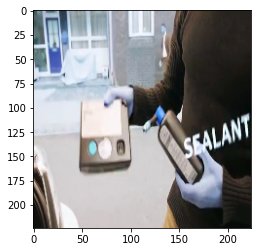

In [ ]:
plt.imshow(dataset[30000])

In [ ]:
sum_frames=len(dataset)

In [ ]:
print(sum_frames)

33044


Padding data (NOT USING)

In [ ]:
#from keras.preprocessing.sequence import pad_sequences
#padded_frames = pad_sequences(dataset)

In [ ]:
#len(padded_frames[0])

In [ ]:
#len(padded_frames[4])

X/Image data DATA TO NUMPY ARRAY


In [ ]:
padded_frames=dataset

In [ ]:
padded_frames = np.array(padded_frames)
print('done')

done


Divide test and train

In [ ]:
padded_frames_train=padded_frames[0:25044]

In [ ]:
padded_frames_train.shape

(25044, 224, 224, 3)

In [ ]:
padded_frames_test=padded_frames[25044:]

In [ ]:
padded_frames_test.shape

(8000, 224, 224, 3)

Preprocessing Y/Labels data

In [ ]:
Y_padded= df_edit[2]

In [ ]:
Y_padded[1][1906]

2

In [ ]:
Y_long=[]
for j in range(7):
  for k in Y_padded[j]:
    Y_long.append(k)

In [ ]:
print(len(Y_long))
Y_long = np.array(Y_long)
print(Y_long.shape)

33044
(33044,)


In [ ]:
Y_long.shape

(33044,)

One Hot Encoding the Y data 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
Y_long = Y_long.reshape(len(Y_long), 1)
Y_long = onehot_encoder.fit_transform(Y_long)
print(Y_long.shape)

(33044, 5)


In [ ]:
Y_padded_train=Y_long[0:25044]
print(Y_padded_train.shape)

(25044, 5)


In [ ]:
Y_padded_test=Y_long[25044:]
print(Y_padded_test.shape)

(8000, 5)


Extracting image features from VGG pretrained Model

In [ ]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Flatten, Input, GRU, Attention, Concatenate,TimeDistributed
from tensorflow.keras.optimizers import RMSprop

In [ ]:
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
features_extracted = conv_base.predict(padded_frames_train)

In [ ]:
features_extracted.shape

(25044, 7, 7, 512)

In [ ]:
X_train_features_extracted= features_extracted.reshape(25044,7*7,512)

In [ ]:
X_train_features_extracted.shape

(25044, 49, 512)

In [ ]:
#conv_base.save_weights("/content/drive/My Drive/HSA-RNN/vgg_weights_imgnet.h5")

#Model

In [ ]:
encoder_inputs = Input(shape = (49, 512))

encoder_BidirectionalLSTM = Bidirectional(LSTM(64, return_sequences = True))
encoder_out = encoder_BidirectionalLSTM(encoder_inputs)

decoder_BidirectionalLSTM = Bidirectional(LSTM(64, return_sequences = True))
decoder_out = decoder_BidirectionalLSTM(encoder_out)

attn_layer = Attention(use_scale = True)
attn_out =  attn_layer([encoder_out, decoder_out])

dense = Dense(128, activation = 'relu')
decoder_pred = dense(attn_out)

d1= LSTM(64,dropout=0.5)(decoder_pred)

d2= Dense(5, activation="softmax")(d1)

from tensorflow.keras.models import Model
model = Model(inputs = encoder_inputs, outputs = d2)
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 49, 512)]    0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 49, 128)      295424      input_2[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 49, 128)      98816       bidirectional[0][0]              
__________________________________________________________________________________________________
attention (Attention)           (None, 49, 128)      1           bidirectional[0][0]              
                                                                 bidirectional_1[0][0] 

FOR MORE EPOCHS USE THIS:
initial_learning_rate = 0.00001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.9,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=lr_schedule, rho=0.9,epsilon=1e-05,),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_features_extracted, Y_padded_train, epochs = 10) #Put epoch value accordingly

Epoch 1/10
783/783 [==============================] - 14s 18ms/step - loss: 0.3954 - accuracy: 0.8603
Epoch 2/10
783/783 [==============================] - 14s 18ms/step - loss: 0.1497 - accuracy: 0.9512
Epoch 3/10
783/783 [==============================] - 14s 18ms/step - loss: 0.1126 - accuracy: 0.9654
Epoch 4/10
783/783 [==============================] - 14s 18ms/step - loss: 0.0913 - accuracy: 0.9724
Epoch 5/10
783/783 [==============================] - 14s 18ms/step - loss: 0.0793 - accuracy: 0.9766
Epoch 6/10
783/783 [==============================] - 14s 18ms/step - loss: 0.0693 - accuracy: 0.9803
Epoch 7/10
783/783 [==============================] - 14s 18ms/step - loss: 0.0665 - accuracy: 0.9812
Epoch 8/10
783/783 [==============================] - 14s 18ms/step - loss: 0.0603 - accuracy: 0.9831
Epoch 9/10
783/783 [==============================] - 14s 18ms/step - loss: 0.0527 - accuracy: 0.9854
Epoch 10/10
783/783 [==============================] - 14s 18ms/step - loss: 0.051

Testing

In [ ]:
features_extracted_test = conv_base.predict(padded_frames_test)

In [ ]:
X_test_features_extracted= features_extracted_test.reshape(8000,7*7,512)

In [ ]:
Y_pred = model.predict(X_test_features_extracted)

In [ ]:
Y_pred.shape #this should match Y_padded_test.shape 

(8000, 5)

In [ ]:
Y_padded_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
print(Y_pred)

[[9.9898964e-01 5.1735959e-04 3.2429825e-04 1.4705033e-04 2.1684962e-05]
 [9.9898964e-01 5.1735959e-04 3.2429825e-04 1.4705033e-04 2.1684962e-05]
 [9.9898964e-01 5.1735959e-04 3.2429825e-04 1.4705033e-04 2.1684962e-05]
 ...
 [9.1688997e-01 7.9047635e-02 2.8531197e-03 2.7869965e-04 9.3061093e-04]
 [9.1721249e-01 7.8725420e-02 2.8535707e-03 2.7745505e-04 9.3104836e-04]
 [9.1702849e-01 7.8911766e-02 2.8513500e-03 2.7797566e-04 9.3042001e-04]]


In [ ]:
Y_edited = np.zeros_like(Y_pred)
Y_edited[np.arange(len(Y_pred)), Y_pred.argmax(1)] = 1

In [ ]:
print(Y_edited)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
Y_edited.shape

(8000, 5)

In [ ]:
#f-measure check
from sklearn.metrics import f1_score
f1_score(Y_padded_test,Y_edited, average='micro')

0.36687500000000006

In [ ]:
Y_padded_test[7999][4]

0.0

Evaluation Code

In [ ]:
evaluation=model.evaluate(X_test_features_extracted,Y_padded_test,batch_size=128)

63/63 [==============================] - 1s 13ms/step - loss: 2.9274 - accuracy: 0.3669


In [ ]:
evaluation

[2.927428960800171, 0.3668749928474426]

In [ ]:
resulting_frames_actual=[]
resulting_frames_predicted=[]

In [ ]:
for i in range(8000):
  if (Y_padded_test[i][3]==1 or Y_padded_test[i][4]==1):
    resulting_frames_actual.append(i)

In [ ]:
column_names = ["Video_Number", "Frame_count", "Timestamp"]
Frame_video_actual = pd.DataFrame(columns = column_names)

for i in resulting_frames_actual:
  Frame_video_actual = Frame_video_actual.append(Frame_data.loc[25044 + i ])

In [ ]:
len(Frame_video_actual)

980

In [ ]:
len(resulting_frames_actual)

980

In [ ]:
for i in range(8000):
  if (Y_edited[i][3]==1 or Y_edited[i][4]==1):
    resulting_frames_predicted.append(i)

In [ ]:
column_names = ["Video_Number", "Frame_count", "Timestamp"]
Frame_video_pred = pd.DataFrame(columns = column_names)

for i in resulting_frames_predicted:
  Frame_video_pred = Frame_video_pred.append(Frame_data.loc[25044 + i ])

In [ ]:
Frame_video_pred.head()

,Video_Number,Frame_count,Timestamp
25059,6.0,25060.0,0.500500
25061,6.0,25062.0,0.567233
25062,6.0,25063.0,0.600600
25064,6.0,25065.0,0.667333
25203,6.0,25204.0,5.305300


In [ ]:
len(resulting_frames_predicted)

688

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_padded_test.argmax(1),Y_edited.argmax(1))

In [ ]:
cm.shape

(5, 5)

Text(0.5, 1.0, 'Confusion Matrix')

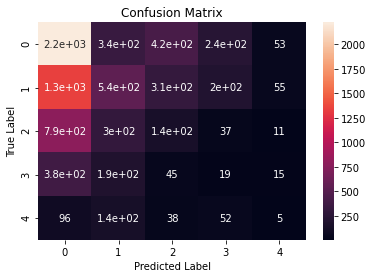

In [ ]:
import seaborn as sns
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
# show a nicely formatted classification report
print(classification_report(Y_padded_test, Y_edited))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import DepthwiseConv2D,BatchNormalization, Activation,Input,MaxPool2D
#VGG with Mobilenet
model = Sequential()

####################################VGG16 original######################################################################
#model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
########################################################################################################

##############################VGG using Mobilenet##########################################################
####################### 1st Conv ############################################################################
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(224,224,3)))
######################## 2nd Conv (Seperable) ##########################################################################
model.add(DepthwiseConv2D(kernel_size=(3,3),strides=(2,2),use_bias=False,padding='same',name='Dept_1a'))
model.add(BatchNormalization(name='BN_1.1a'))
model.add(Activation('relu', name='Act_1.1a'))
model.add(Conv2D(64,kernel_size=(1,1),strides=(1,1), use_bias=False,padding='same', name='Point_1a'))
model.add(BatchNormalization(name='BN_1.2a'))
model.add(Activation('relu', name='Act_1.2a'))
##################################### 3nrd Conv #########################################################
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='Max_Pool_1'))
model.add(DepthwiseConv2D(kernel_size=(3,3),strides=(2,2), use_bias= False, padding='same', name='Dept_2a'))
model.add(BatchNormalization(name='BN_2.1a'))
model.add(Activation('relu', name='Act_2.1a'))
model.add(Conv2D(128, kernel_size=(1,1), strides=(1,1), use_bias=False, padding='same', name='Point_2a'))
model.add(BatchNormalization(name='BN_2.2a'))
model.add(Activation('relu', name='Act_2.2a'))
##################################### 4th Conv #########################################################
model.add(DepthwiseConv2D(kernel_size=(3,3),strides=(2,2), use_bias= False, padding='same', name='Dept_2b'))
model.add(BatchNormalization(name='BN_2.1b'))
model.add(Activation('relu', name='Act_2.1b'))
model.add(Conv2D(128, kernel_size=(1,1), strides=(1,1), use_bias=False, padding='same', name='Point_2b'))
model.add(BatchNormalization(name='BN_2.2b'))
model.add(Activation('relu', name='Act_2.2b'))
##################################### 5th Conv #########################################################
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), name='Max_Pool_2'))

In [ ]:

import keras
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
Dept_1a (DepthwiseConv2D)    (None, 111, 111, 64)      576       
_________________________________________________________________
BN_1.1a (BatchNormalization) (None, 111, 111, 64)      256       
_________________________________________________________________
Act_1.1a (Activation)        (None, 111, 111, 64)      0         
_________________________________________________________________
Point_1a (Conv2D)            (None, 111, 111, 64)      4096      
_________________________________________________________________
BN_1.2a (BatchNormalization) (None, 111, 111, 64)      256       
_________________________________________________________________
Act_1.2a (Activation)        (None, 111, 111, 64)     